Created by Berkay Alan

Reinforcement Learning

12 of October, 2022

***

Resource : [Reinforcement Learning Tutorial | Reinforcement Learning Example Using Python | Edureka](https://www.youtube.com/watch?v=LzaWrmKL1Z4&t=1294s&ab_channel=edureka%21)

In [2]:
import numpy as np

Place and agent in any one of the rooms(0,1,2,3,4) and the goal is to reach outside the building room.

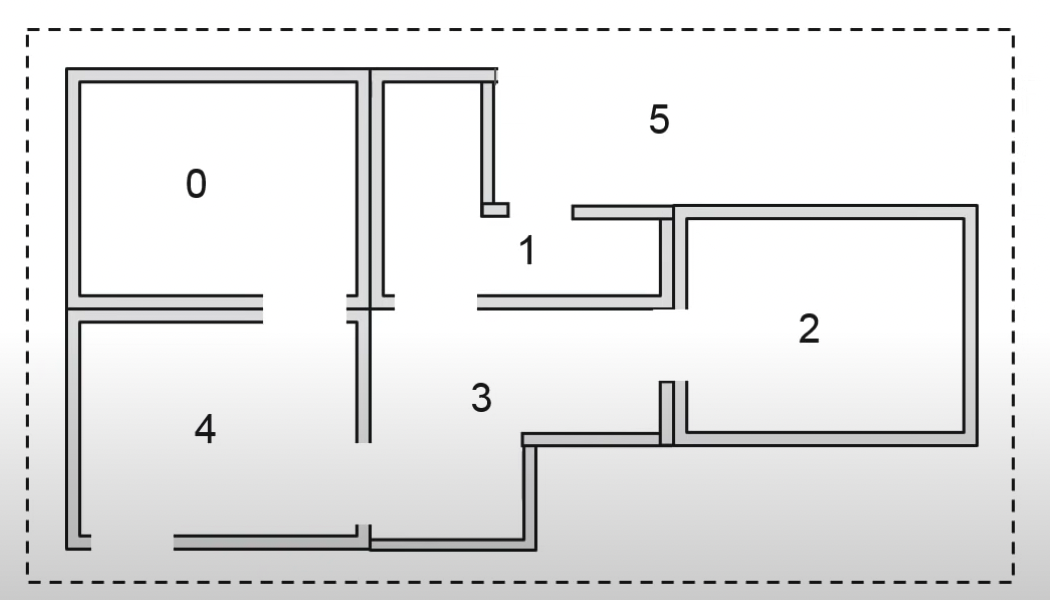

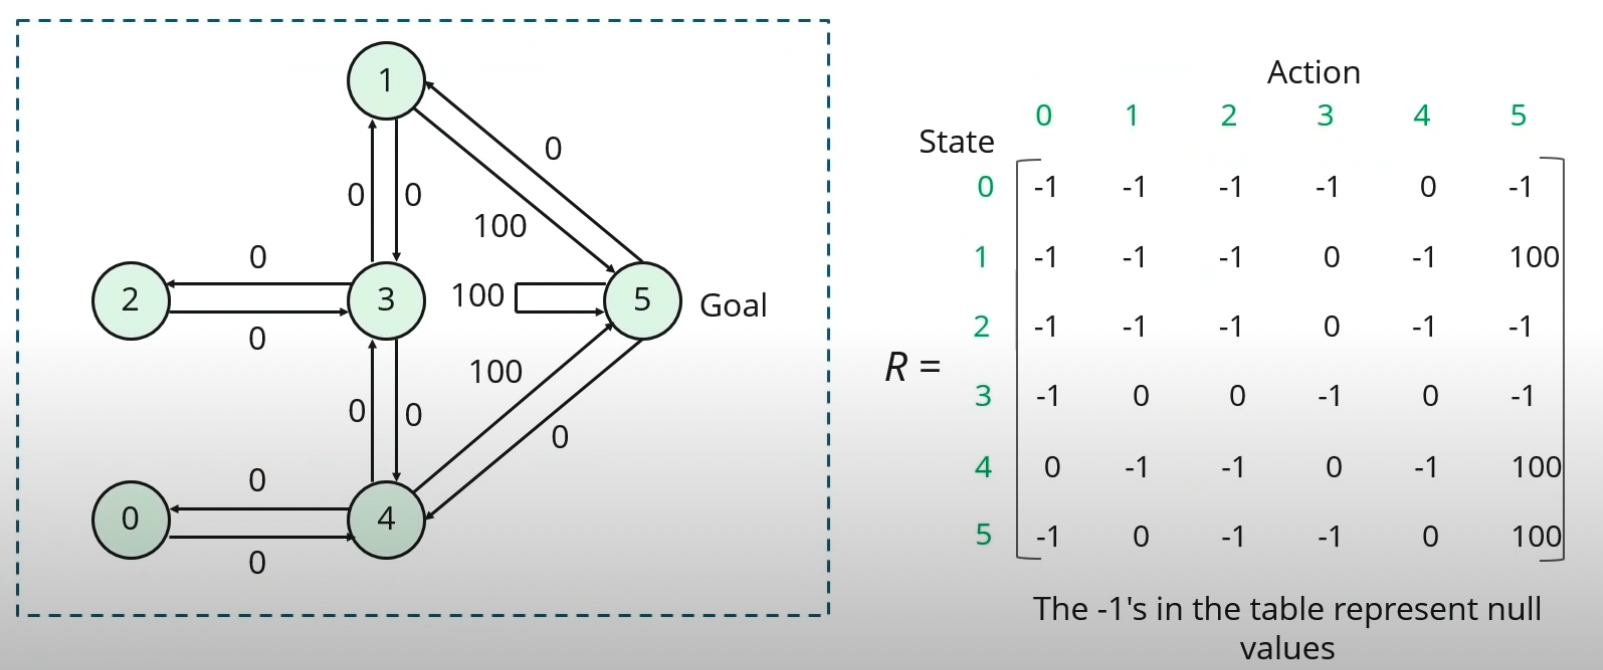

In [43]:
# R Matrix

R = np.matrix([[-1,-1,-1,-1,0,-1],
               [-1,-1,-1,0,-1,100],
               [-1,-1,-1,0,-1,-1],
               [-1,0,0,-1,0,-1],
               [-1,0,0,-1,-1,100],
               [-1,0,-1,-1,0,100]])

In [44]:
R

matrix([[ -1,  -1,  -1,  -1,   0,  -1],
        [ -1,  -1,  -1,   0,  -1, 100],
        [ -1,  -1,  -1,   0,  -1,  -1],
        [ -1,   0,   0,  -1,   0,  -1],
        [ -1,   0,   0,  -1,  -1, 100],
        [ -1,   0,  -1,  -1,   0, 100]])

In [45]:
# Qabs Matrix

Q = np.matrix(np.zeros([6,6]))

In [46]:
Q

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [47]:
# Gamma (Learning Parameter)

gamma = 0.8

In [48]:
# initial state - random - 2nd row

initial_state = 2

In [49]:
def available_actions(state):
    current_state = R[state,]
    av_act = np.where(current_state>=0)[1] # if there is reward
    return av_act

In [50]:
#get available actions in the current state

available_act = available_actions(initial_state)

In [51]:
available_act

array([3])

In [52]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [53]:
action = sample_next_action(available_act)

In [54]:
action

3

In [55]:
def update(current_state,action,gamma):
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action,max_index]
    
    # Q formula
    
    Q[current_state,action] = R[current_state,action] + gamma *max_value

In [56]:
update(initial_state,action,gamma)

## Training

In [70]:
for i in range(100000):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action, gamma)

## Testing

In [71]:
# goal state = 5

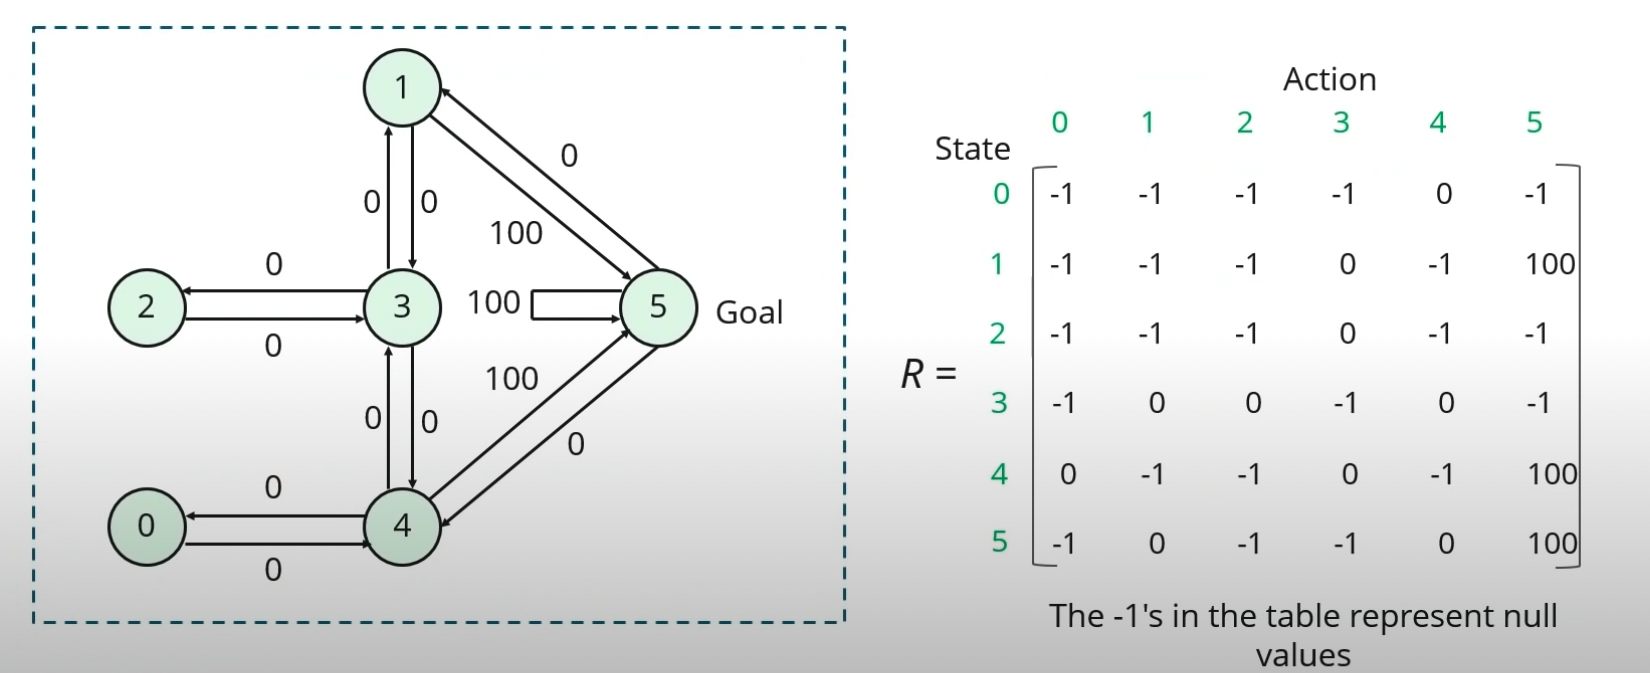

In [91]:
def step_calculate(current_state):
    
    steps = [current_state]
    
    while current_state!=5:
        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index,size=1))
        else:
            next_step_index = int(next_step_index)

        steps.append(next_step_index)
        current_state = next_step_index

    print("Selected path is", steps)

In [92]:
# Normalize the matrix

print("Trained Q Matrix: ")
print(Q/ np.max(Q)*100)

Trained Q Matrix: 
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [93]:
step_calculate(0)

Selected path is [0, 4, 5]


In [94]:
step_calculate(2)

Selected path is [2, 3, 4, 5]
